<a href="https://colab.research.google.com/github/GhanshyamVariya/Anand/blob/master/question_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [0]:
# import basics
import string
from collections import Counter, defaultdict

# imports
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS

## NLP
from nltk.corpus import stopwords
import nltk

# word_tokenizer
from nltk import word_tokenize

# import lamitizer
from nltk.stem import WordNetLemmatizer

# import stemmer
from nltk.stem.porter import PorterStemmer

# import gensim
from gensim.corpora.dictionary import Dictionary

# import Tf-idf
from gensim.models.tfidfmodel import TfidfModel

# import spacy
import spacy

## Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [0]:
import warnings

warnings.filterwarnings(action='ignore', category=UserWarning)

In [0]:
sns.set()

### Dataset load

In [0]:
train = pd.read_csv('datasets/train.csv', encoding='latin1', index_col=0)

In [0]:
train.head()

,id,question,category_id
0,10479,When will there be a Job switch?,Career
2,9845,Will I ever become financially independent?,Wealth
4,8311,Will I become rich one day?,Wealth
5,14073,How many children will I have?,Family
6,14815,When will i get married,Partner


In [0]:
train.loc[train['category_id'] == 'Children', 'category_id'] = 'Family'
train.loc[train['category_id'] == 'Love', 'category_id'] = 'Partner'

In [0]:
train = train[train.category_id!='Daily Life']

In [0]:
train.head()

,id,question,category_id
0,10479,When will there be a Job switch?,Career
2,9845,Will I ever become financially independent?,Wealth
4,8311,Will I become rich one day?,Wealth
5,14073,How many children will I have?,Family
6,14815,When will i get married,Partner


In [0]:
# Data types of training samples
train.dtypes

id              int64
question       object
category_id    object
dtype: object

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2945 entries, 0 to 4216
Data columns (total 3 columns):
id             2945 non-null int64
question       2945 non-null object
category_id    2945 non-null object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [0]:
# Category of question
question = pd.unique(train.category_id).tolist()

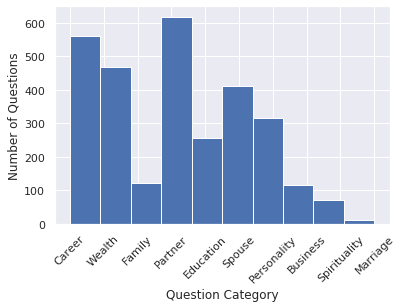

In [0]:
plt.hist(train['category_id'])
plt.xticks(rotation=45)
plt.xlabel('Question Category')
plt.ylabel('Number of Questions')
plt.show()

In [0]:
# print to get how many sample for each category
for q in question:
    print("{} : {}".format(q, train[train['category_id']==q].shape[0]))

Career : 560
Wealth : 467
Family : 123
Partner : 618
Education : 255
Spouse : 410
Personality : 316
Business : 116
Spirituality : 70
Marriage : 10


In [0]:
train[train['category_id']=='Spirituality']

,id,question,category_id
284,10571,#test I feel that influence of the planets are...,Spirituality
340,11030,What is my journey towards achieving spiritual...,Spirituality
393,9136,Do I need a Guru to guide my life journey?,Spirituality
456,10601,What is mission of my life? Which are the past...,Spirituality
570,11340,Will I live a happy life? Am I going to have t...,Spirituality
...,...,...,...
4007,16053,I think that the effect of the planets is now ...,Spirituality
4014,16060,I think that the effect of the planets is now ...,Spirituality
4048,16094,What will I gain true knowledge or salvation i...,Spirituality
4124,16170,What is my best way of maintaining the spiritu...,Spirituality


## Cleaning

In [0]:
# Remove Punctuation
def remove_punctuation(text):
    no_punc = "".join([c for c in text if c not in string.punctuation])
    return no_punc

In [0]:
train['question']  = train['question'].apply(lambda x: remove_punctuation(x))

In [0]:
# convert all sentence to the lowercase and return alphabetic data only
def alpha(text):
    alpha = [w for w in word_tokenize(text.lower()) if w.isalpha()]
    return alpha

In [0]:
train['question'] = train['question'].apply(lambda x: alpha(x))

In [0]:
train.head()

,id,question,category_id
0,10479,"[when, will, there, be, a, job, switch]",Career
2,9845,"[will, i, ever, become, financially, independent]",Wealth
4,8311,"[will, i, become, rich, one, day]",Wealth
5,14073,"[how, many, children, will, i, have]",Family
6,14815,"[when, will, i, get, married]",Partner


In [0]:
# remove stop words
def remove_stopword(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [0]:
train['question'] = train['question'].apply(lambda x: remove_stopword(x))

In [0]:
train.head(5)

,id,question,category_id
0,10479,"[job, switch]",Career
2,9845,"[ever, become, financially, independent]",Wealth
4,8311,"[become, rich, one, day]",Wealth
5,14073,"[many, children]",Family
6,14815,"[get, married]",Partner


## Stemming & Lemmatizing

### 1. Lemmatizing

In [0]:
# Initiate Lamitizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [0]:
# most_10_common count of each categories
def most_common_count(list_of_words):
    #print(list_of_words)
    return Counter(list_of_words.sum()).most_common(10)

In [0]:
# Most common word for Wealth category 
most_common_count(train[train['category_id']=='Wealth']['question'])

[('day', 186),
 ('rich', 158),
 ('become', 135),
 ('one', 114),
 ('yes', 100),
 ('financially', 80),
 ('ever', 79),
 ('independent', 78),
 ('adversary', 72),
 ('money', 68)]

### 2. Stemming

In [0]:
# Initiate Stemmer
stemmer = PorterStemmer()

In [0]:
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [0]:
train['question'] = train['question'].apply(lambda x: word_stemmer(x))

In [0]:
train.head()

,id,question,category_id
0,10479,job switch,Career
2,9845,ever becom financi independ,Wealth
4,8311,becom rich one day,Wealth
5,14073,mani children,Family
6,14815,get marri,Partner


## Visualization

In [0]:
sorted(pd.unique(train['category_id']))

['Business',
 'Career',
 'Education',
 'Family',
 'Marriage',
 'Partner',
 'Personality',
 'Spirituality',
 'Spouse',
 'Wealth']

In [0]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [0]:
tempData = train[train['category_id']=='Marriage']['question']

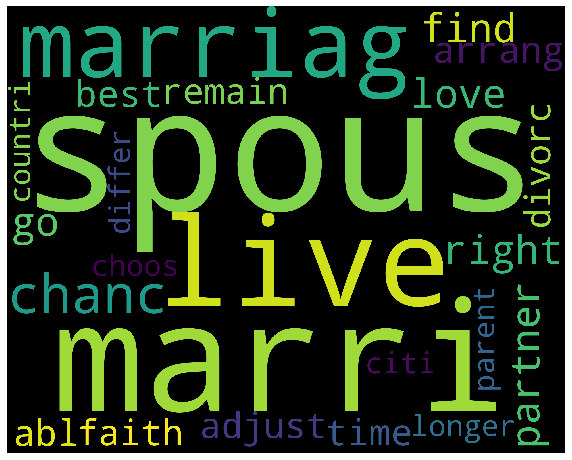

In [0]:
wordcloud_draw(tempData,'black')

### Modeling

In [0]:
train.head()

,id,question,category_id
0,10479,job switch,Career
2,9845,ever becom financi independ,Wealth
4,8311,becom rich one day,Wealth
5,14073,mani children,Family
6,14815,get marri,Partner


#### Train and Test Split

In [0]:
# create serial to store labels
y = train['category_id']

In [0]:
# create training and test set
X_train, X_test, y_train, y_test = train_test_split(train['question'], y, test_size=0.2, random_state=53)

#### CountVectorizer for text classification

In [0]:
# Intialize CountVectorize object
count_vectorizer = CountVectorizer(stop_words='english')

In [0]:
# fit and transform X_train
count_train = count_vectorizer.fit_transform(X_train)

In [0]:
# transform the X_test
count_test = count_vectorizer.transform(X_test)

In [0]:
# print the last 10 feature of count vectorizer
print(count_vectorizer.get_feature_names()[-10:-1])

['wonder', 'work', 'workplac', 'worri', 'write', 'wrong', 'ye', 'year', 'yog']


In [0]:
# create count_vectorizer dataframe 
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [0]:
# print head of count_df
count_df.head()

,aata,aaya,abl,abroad,academ,accept,accord,achiev,acquir,act,...,wonder,work,workplac,worri,write,wrong,ye,year,yog,younger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TfidfVectorizer for text classification

In [0]:
# Intialize TfidfVEctorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [0]:
# fit and tranform xtrain
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [0]:
# transform xtest
tfidf_test = tfidf_vectorizer.transform(X_test)

In [0]:
# print the first 10 feature of tfidf vectorizer
print(tfidf_vectorizer.get_feature_names()[:10])

['aata', 'aaya', 'abl', 'abroad', 'academ', 'accept', 'accord', 'achiev', 'acquir', 'act']


In [0]:
# print first 5 vectors of tfidf training data
print(tfidf_train.A.shape)

(2356, 573)


In [0]:
# create tfidf dataframe
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [0]:
# print of head of tfidf
tfidf_df.head()

,aata,aaya,abl,abroad,academ,accept,accord,achiev,acquir,act,...,wonder,work,workplac,worri,write,wrong,ye,year,yog,younger
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### -----------------------------------------------------------

In [0]:
# calculate the differences in columns between CountVectorizer and TfIdfVectorizer
diffrence = set(count_df.columns) - set(tfidf_df.columns)

In [0]:
diffrence

set()

In [0]:
# check wether dataframe are equals
count_df.equals(tfidf_df)

False

### Naive Bayes

In [0]:
def naive_bayes_out(X_train, X_test, y_train, y_test):
    # intiate Multinomial naive_bayes
    clf = MultinomialNB()
    
    # fit the model
    clf.fit(X_train, y_train)
    
    # predict the model
    y_pred = clf.predict(X_test)
    
    # score of model
    score = clf.score(X_train, y_train)
    
    # accuracy 
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    return score, accuracy

#### 1. Count Vector

In [0]:
score, accuracy = naive_bayes_out(count_train, count_test, y_train, y_test)

In [0]:
print('Score : ', score*100)

Score :  96.7741935483871


In [0]:
print('Accuracy : ', accuracy*100)

Accuracy :  96.7741935483871


#### 2. Tfid Vector

In [0]:
score, accuracy = naive_bayes_out(tfidf_train, tfidf_test, y_train, y_test)

In [0]:
print('Score : ', score*100)

Score :  97.32597623089984


In [0]:
print('Accuracy : ', accuracy*100)

Accuracy :  96.7741935483871


#### -----------------------------------------------------------------------

#### Improving Model

In [0]:
# create list of alpha
alphas = np.arange(0, 1, 0.1)

In [0]:
def train_and_predict(alpha, type='tf'):
    # intiate classification model
    nb_classification = MultinomialNB(alpha=alpha)
    if type=='tf':
        # fit
        nb_classification.fit(tfidf_train, y_train)
        # predict
        pred = nb_classification.predict(tfidf_test)
        score = metrics.accuracy_score(y_test, pred)
    if type=='cv':
        # fit
        nb_classification.fit(count_train, y_train)
        # predict
        pred = nb_classification.predict(count_test)
        score = metrics.accuracy_score(y_test, pred)
        
    return score

##### 1. CountVectorizer

In [0]:
score = 0
alpha = 0
for alpha in alphas:
    #print('Alpha : ', alpha)
    #print('Score: ', train_and_predict(alpha))
    if score<train_and_predict(alpha, type='cv'): 
        score=train_and_predict(alpha, type='cv') 
        alpha=alpha
print('Best Score is {} for alpha {}.'.format(score, alpha))

Best Score is 0.9779286926994907 for alpha 0.9.


#### 2. TfidVectorizer

In [0]:
score = 0
alpha = 0
for alpha in alphas:
    #print('Alpha : ', alpha)
    #print('Score: ', train_and_predict(alpha))
    if score<train_and_predict(alpha, type='tf'): 
        score=train_and_predict(alpha, type='tf')
        alpha=alpha
print('Best Score is {} for alpha {}.'.format(score, alpha))

Best Score is 0.9796264855687606 for alpha 0.9.


In [0]:
score = 0
alpha = 0
for alpha in alphas:
    #print('Alpha : ', alpha)
    #print('Score: ', train_and_predict(alpha))
    if score<train_and_predict(alpha): 
        score=train_and_predict(alpha) 
        alpha=alpha
print('Best Score is {} for alpha {}.'.format(score, alpha))

Best Score is 0.9796264855687606 for alpha 0.9.


### Final Model

In [0]:
# final model
clf = MultinomialNB(alpha=0.9)

In [0]:
clf.fit(tfidf_train, y_train)

MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True)

In [0]:
y_pred = clf.predict(tfidf_test)

In [0]:
# Score
metrics.accuracy_score(y_test, y_pred)

0.9711375212224108

In [0]:
def predict_out():
    temp = input('Enter Question : ')
    temp = tfidf_vectorizer.transform([temp])
    print('\nYou are asking question about : ')
    print('--------------------------------')
    print("{}".format(clf.predict(temp)[0]))
    print('--------------------------------')

In [0]:
predict_out()

Enter Question : When I'll switch job?

You are asking question about : 
--------------------------------
Career
--------------------------------


In [0]:
# Load Test Dataset
test = pd.read_csv('datasets/test.csv', index_col=0, names=['question'])

In [0]:
test.head()

,question
244,Does my Kundali says about foreign travel?
242,Discribe something about my personality!
253,I want to about my finance position
252,how will my career be in coming years?
240,"hello, Is my future prediction right..."


In [0]:
clf.predict(tfidf_vectorizer.transform(test['question'].iloc[:10]))

array(['Career', 'Partner', 'Career', 'Career', 'Spouse', 'Wealth',
       'Partner', 'Partner', 'Partner', 'Partner'], dtype='<U12')

In [0]:
pd.DataFrame({'question': test['question'].iloc[:10], 'category': clf.predict(tfidf_vectorizer.transform(test['question'].iloc[:10]))})

,question,category
244,Does my Kundali says about foreign travel?,Career
242,Discribe something about my personality!,Partner
253,I want to about my finance position,Career
252,how will my career be in coming years?,Career
240,"hello, Is my future prediction right...",Spouse
248,is this day lucky for me?,Wealth
246,hello. how are you doing,Partner
247,when i will get married,Partner
255,helloo...i have done this for testing purpose,Partner
256,will i ever win a lottery?,Partner
